# Feature Engineering - Handling NaN values

Why are their Missing values??

* They hesitate to put down the information

* Survey informations are not that valid
      eg: 
        1. Men--salary
        2. Women---age


* People may have died----NAN

## There are 2 types of missing data

### 1) Missing data not at Random (MNAR)

There is some relationship that exists between the dataset that is missing within the dataset

in detail : 
Systematic missing Values There is absolutely some relationship between the data missing and any other values, observed or missing, within the dataset.


### 1) Missing at Random (MAR)

    eg :
1. Men --- hide their salary &
2. Women -- hide their age

# All techniques to handel missing values

1. Dropping the NaN values
2. Mean/ Median/Mode replacement
3. Random Sample Imputation
4. Capturing NAN values with 0 and other values with 1
5. End of Distribution imputation
6. Arbitrary imputation
7. Frequent categories imputation
8. CategoricalImputer

To get more info read this : https://feature-engine.readthedocs.io/en/latest/imputation/index.html

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('titanic.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 1) Dropping the NaN values

Dropping the nan values is a bad approach because here we will loose the information so ......avoid this as much as possible

In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
# Below is the code 
df1 = df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

# axis means rows or columns --> 0 for rows and 1 for columns
# how: 'any' means Drop the rows where any elements are missing.
# thresh = 2 means Keep only the rows with at least 2 non-NA values. (more than 2 remove)
# subset means we acn specify the particular columns to look for missing values. eg: subset=['col_name_1', 'col_name_2']

#doing all this from feature engine module

from feature_engine.imputation import DropMissingData

missingdata_imputer = DropMissingData(variables=['col_name', 'col_name'])

#if you wanto to directly fit to the data

DropMissingData.fit(df)


#if you want to fit the data to both tainning and testing

#DropMissingData.fit(X_train)

transform the data

train_t = DropMissingData.transform(X_train)

test_t = DropMissingData.transform(X_test)

## 2)  Mean/Median/Mode replacement

In [6]:
# to take the columns which has nan values 

columns_with_nan = [feature for feature in df.columns if df[feature].isnull().sum() > 1]
columns_with_nan

['Age', 'Cabin', 'Embarked']

In [7]:
# taking only the columns which has nan values manually
df2 = pd.read_csv('titanic.csv', usecols = ['Age', 'Cabin', 'Embarked'])
df2.head()

,Age,Cabin,Embarked
0,22.0,NaN,S
1,38.0,C85,C
2,26.0,NaN,S
3,35.0,C123,S
4,35.0,NaN,S


In [8]:
df2.isnull().sum()

Age         177
Cabin       687
Embarked      2
dtype: int64

In [9]:
df2.isnull().mean()

Age         0.198653
Cabin       0.771044
Embarked    0.002245
dtype: float64

In [10]:
## filling NaN values for some columns (i.e variable)

def impute_nan(df, variable, median):
    df[variable + "_median"] = df[variable].fillna(median)

In [11]:
median = df2.Age.median()
median

28.0

In [12]:
# here I am doing for single column same likw this we can so for all columns
impute_nan(df2, 'Age', median)

#if you want to do for all columns use the below code:

# for feature in ['Age', 'Cabin', 'Embarked']:
#     impute_nan(df2, feature)


# doing for all columns in much more simple way

# columns_with_nan = [feature for feature in df2.columns if df2[feature].isnull().sum() > 1]

# for feature in columns_with_nan:
#     impute_nan(df2, feature)

In [13]:
df2.head()

,Age,Cabin,Embarked,Age_median
0,22.0,NaN,S,22.0
1,38.0,C85,C,38.0
2,26.0,NaN,S,26.0
3,35.0,C123,S,35.0
4,35.0,NaN,S,35.0


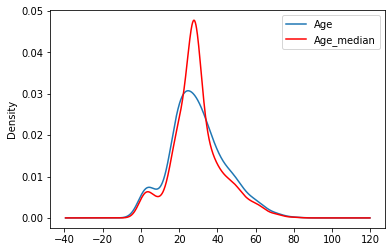

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111)
df2['Age'].plot(kind='kde', ax=ax)
df2['Age_median'].plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

### Advantages And Disadvantages of Mean/Median Imputation¶
#### Advantages
1. Easy to implement(Robust to outliers)
2. Faster way to obtain the complete dataset 

### Disadvantages
1. Change or Distortion in the original variance
2. Impacts Correlation

## 3) Random Sample Imputation

* Aim: Random sample imputation consists of taking random observation from the dataset and we use this observation to replace the nan values
* When should it be used? It assumes that the data are missing completely at random(MCAR)

In [15]:
df3 = pd.read_csv('titanic.csv',usecols=['Age','Fare','Survived'])

In [16]:
df3.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [17]:
df3.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [18]:
# just picking one sample randomly (here I have used drop na because I don't need the na row)
df3['Age'].dropna().sample()

27    19.0
Name: Age, dtype: float64

In [19]:
# the below code check where is null values are present and replace Nan with random sample
df3['Age'].dropna().sample(df3['Age'].isnull().sum())

177    50.0
877    19.0
44     19.0
20     35.0
316    24.0
       ... 
599    49.0
361    29.0
49     18.0
642     2.0
706    45.0
Name: Age, Length: 177, dtype: float64

In [20]:
# Here I have used random_state because it replace NaN with specific value only ( if we not use random_state then values change evrytime when we run .)

df3['Age'].dropna().sample(df3['Age'].isnull().sum(),random_state=0)

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [21]:
# to get the null values index column 
df3[df3['Age'].isnull()].index

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

In [22]:
def RSI(df, variable, median):
    df[variable+'_median'] = df[variable].fillna(median) # replace Nan with median
    df[variable+'_random'] = df[variable] # Copy feature into new feature
    #calculate random sample and store into random_sample_values
    random_sample_value = df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    
    #in random_sample_value all filled nan values are present now we want to put/merge this all filled values in our dataset
    # for this we want to match all nan values index in random_sample_values with df[variable_'random] 
    #Pandas need to have same index in order to merge dataset
    random_sample_value.index = df[df[variable].isnull()].index#find index of NaN values in feature
    #now put a condition where ever it is null with loc function then replace with random_sample_values
    df.loc[df[variable].isnull(),variable+'_random'] = random_sample_value

In [23]:
median = df3['Age'].median()
median

28.0

In [24]:
RSI(df3,'Age',median)

In [25]:
df3.head()

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


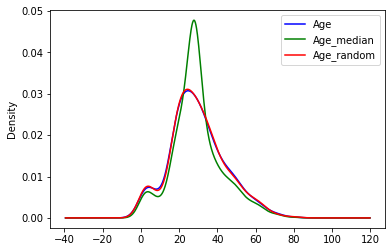

In [26]:
fig = plt.figure()
ax = fig.add_subplot(111)
df3['Age'].plot(kind='kde', ax=ax, color = 'blue')
df3['Age_median'].plot(kind='kde', ax=ax, color='green')
df3['Age_random'].plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

### Info: 

* random_state (default=None): There are 2 ways in which the seed can be set in the RandomSampleImputer()

      * If seed = ‘general’ then the random_state can be either None or an integer. The seed will be used as the random_state and all observations will be imputed in one go. This is equivalent to pandas.sample(n, random_state=seed) where n is the number of observations with missing data.

      * If seed = ‘observation’, then the random_state should be a variable name or a list of variable names. The seed will be calculated observation per observation, either by adding or multiplying the seeding variable values, and passed to the random_state. Then, a value will be extracted from the train set using that seed and used to replace the NAN in particular observation. This is the equivalent of pandas.sample(1, random_state=var1+var2) if the ‘seeding_method’ is set to ‘add’ or pandas.sample(1, random_state=var1*var2) if the ‘seeding_method’ is set to ‘multiply’.
      
* For more details on why this functionality is important refer to the course Feature Engineering for Machine Learning in Udemy: https://www.udemy.com/feature-engineering-for-machine-learning/  

### Advantages

1. from plot we can say that Random Sample Imputation work better than Mean Median Mode imputation is some cases.
2. Easy To implement
3. There is less distortion in variance

### Disadvantage

1. Every situation randomness wont work

## 4) Capturing NAN values with 0 and other values with 1

It works well if the data are not missing completely at random

In [27]:
df4 = pd.read_csv('titanic.csv', usecols = ['Age', 'Fare', 'Survived'])

In [28]:
# creating new column name and in that we have 1 --> for nan value and 0 --> for other values
df4['Age_NaN'] = np.where(df4['Age'].isnull(),1,0)
df4.head(10)

,Survived,Age,Fare,Age_NaN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,NaN,8.4583,1
6,0,54.0,51.8625,0
7,0,2.0,21.0750,0
8,1,27.0,11.1333,0
9,1,14.0,30.0708,0


### Advantages

1. Easy to implement
2. Captures the importance of missing values

### Disadvantages

1. Creating Additional Features(Curse of Dimensionality)

## 5) End of Distribution imputation

In [29]:
df5 = pd.read_csv('titanic.csv', usecols = ['Age', 'Fare', 'Survived'])
df5.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


<AxesSubplot:>

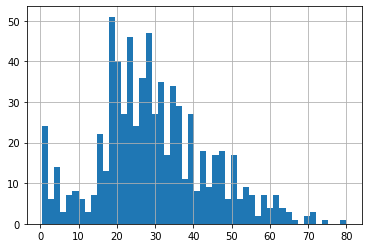

In [30]:
df5.Age.hist(bins = 50)

In [31]:
extreme = df5.Age.mean() + 3*df5.Age.std()
extreme

73.27860964406094

In [32]:
def impute_nan(df,variable,extreme):
    df[variable + "_end_distribution"] = df[variable].fillna(extreme)

In [33]:
impute_nan(df5,'Age',extreme)
df5.head()

,Survived,Age,Fare,Age_end_distribution
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


<AxesSubplot:>

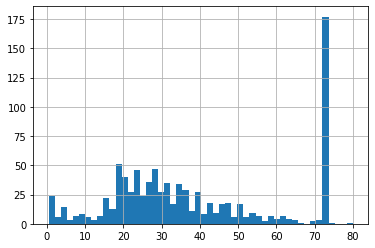

In [34]:
df5['Age_end_distribution'].hist(bins = 50)

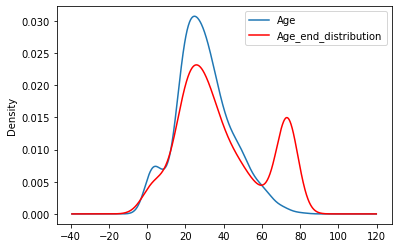

In [35]:
fig = plt.figure()
ax = fig.add_subplot(111)
df5['Age'].plot(kind='kde', ax=ax)
df5['Age_end_distribution'].plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

#### more info about that

* imputation_method = 'gaussian' means uses gaussian type(other types are: ‘gaussian’, ‘iqr’ or ‘max’)

1) Gaussian limits
    a) right tail: mean + 3*std
    b) left tail: mean - 3*std
        
2) IQR limits:
    a) right tail: 75th quantile + 3*IQR
    b) left tail: 25th quantile - 3*IQR
    
3) Maximum value:
    a) right tail: max * 3
    b) left tail: not applicable
    
    
* tail : right tail or left tail

* fold: Factor to multiply the std, the IQR or the Max values (normally used : 2 or 3 for Gaussian, or 1.5 or 3 for IQR )

* variables : column names

## 6) Arbitrary imputation

* impute_nan function Works both for categorical columns and numeric columns
* but sklearn package won't work for categorical feature 

In [36]:
df6 = pd.read_csv('titanic.csv', usecols = ['Age', 'Fare', 'Survived','Cabin'])
df6.head()

,Survived,Age,Fare,Cabin
0,0,22.0,7.2500,NaN
1,1,38.0,71.2833,C85
2,1,26.0,7.9250,NaN
3,1,35.0,53.1000,C123
4,0,35.0,8.0500,NaN


In [37]:
def impute_nan(df, variable):
    df[variable + "_zeros"] = df[variable].fillna(-999)
    df[variable + "_hundreds"] = df[variable].fillna(100)

In [38]:
impute_nan(df6, 'Age')
df6.head()

,Survived,Age,Fare,Cabin,Age_zeros,Age_hundreds
0,0,22.0,7.2500,NaN,22.0,22.0
1,1,38.0,71.2833,C85,38.0,38.0
2,1,26.0,7.9250,NaN,26.0,26.0
3,1,35.0,53.1000,C123,35.0,35.0
4,0,35.0,8.0500,NaN,35.0,35.0


In [39]:
impute_nan(df6, 'Cabin')
df6.head()

,Survived,Age,Fare,Cabin,Age_zeros,Age_hundreds,Cabin_zeros,Cabin_hundreds
0,0,22.0,7.2500,NaN,22.0,22.0,-999,100
1,1,38.0,71.2833,C85,38.0,38.0,C85,C85
2,1,26.0,7.9250,NaN,26.0,26.0,-999,100
3,1,35.0,53.1000,C123,35.0,35.0,C123,C123
4,0,35.0,8.0500,NaN,35.0,35.0,-999,100


## 7) Frequent categories imputation

In [40]:
df7 = pd.read_csv('loan.csv', usecols = ['BsmtQual', 'FireplaceQu', 'GarageType', 'SalePrice'])
df7.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [41]:
df7.isnull().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

In [42]:
df7['BsmtQual'].value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [43]:
# sorting in decending order
df7['BsmtQual'].value_counts().sort_values(ascending = False)

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [44]:
# taking the mose repeated value
df7['BsmtQual'].value_counts().sort_values(ascending = False).index[0]

'TA'

<AxesSubplot:>

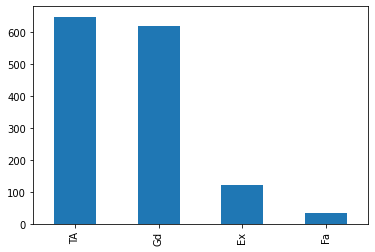

In [45]:
# plotting bar graph
df7['BsmtQual'].value_counts().sort_values(ascending = False).plot.bar()

In [46]:
def impute_nan(df, variable):
    most_frequent_category = df[variable].value_counts().sort_values(ascending = False).index[0]
    df[variable + "_after_replacing"] = df[variable].fillna(most_frequent_category)

In [47]:
for feature in ['BsmtQual', 'FireplaceQu', 'GarageType']:
    impute_nan(df7, feature)

In [48]:
df7.head(5)

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_after_replacing,FireplaceQu_after_replacing,GarageType_after_replacing
0,Gd,NaN,Attchd,208500,Gd,Gd,Attchd
1,Gd,TA,Attchd,181500,Gd,TA,Attchd
2,Gd,TA,Attchd,223500,Gd,TA,Attchd
3,TA,Gd,Detchd,140000,TA,Gd,Detchd
4,Gd,TA,Attchd,250000,Gd,TA,Attchd


## 8) CategoricalImputer

* The CategoricalImputer() replaces missing data in categorical variables by a string like ‘Missing’ or any other entered by the user. Alternatively, it replaces missing data by the most frequent category.

* impute_nan function Works both for categorical columns and numeric columns

* but sklearn package won't work for numeric feature

In [49]:
df8 = pd.read_csv('loan.csv', usecols = ['BsmtQual', 'FireplaceQu', 'GarageType', 'SalePrice'])
df8.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [50]:
def impute_nan(df, variable):
    df[variable + "_after_replacing"] = df[variable].fillna('Missing')

In [51]:
impute_nan(df8, 'BsmtQual')
df8.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_after_replacing
0,Gd,NaN,Attchd,208500,Gd
1,Gd,TA,Attchd,181500,Gd
2,Gd,TA,Attchd,223500,Gd
3,TA,Gd,Detchd,140000,TA
4,Gd,TA,Attchd,250000,Gd


In [52]:
df8['BsmtQual_after_replacing'].value_counts()

TA         649
Gd         618
Ex         121
Missing     37
Fa          35
Name: BsmtQual_after_replacing, dtype: int64

#### more info on this 

* The CategoricalVariableImputer() works only with categorical variables.

* The user can pass all the columns. Alternatively, the CategoricalImputer() will automatically find and select all variables of type object.

* imputation_method (default=missing) : Desired method of imputation. Can be ‘frequent’ or ‘missing’.

    Note: if we use imputation_method = ‘frequent’ then most frequently accured category is replaced

* fill_value (default=’Missing’) Only used when imputation_method='missing'. Instead of missing we can use any value or any name

# Note 1:

* If you want to run this impute_nan fuction to all columns don't do manually, use the below code
* If you want to apply the impute_nan then you need to cast or separate the numeric and categorical features for only some function
* Below are the list of which feature takes what

1. Dropping the NaN values  -->  Takes both numeric and categorical columns
2. Mean/ Median/Mode replacement --> Takes only numeric columns
3. Random Sample Imputation --> Takes only numeric columns
4. Capturing NAN values with 0 and other values with 1 --> Takes both numeric and categorical columns
5. End of Distribution imputation --> Takes only numeric columns
6. Arbitrary imputation --> Takes both numeric and categorical columns
7. Frequent categories imputation --> Takes both numeric and categorical columns (but we never replace nan value with most repeated value for numeric columns)
8. CategoricalImputer --> Takes both numeric and categorical columns

In [53]:
# we will get all the columns having nan values
columns_with_nan = [feature for feature in df.columns if df[feature].isnull().sum() > 1]
columns_with_nan

['Age', 'Cabin', 'Embarked']

### just to take as an eg, I am running the below code (which will replaces the NaN value with 'Missing' term)

In [54]:
def impute_nan(df, variable):
    df[variable + "_after_replacing"] = df[variable].fillna('Missing')

In [55]:
# to run the function 
for feature in columns_with_nan:
    impute_nan(df, feature)

In [56]:
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_after_replacing,Cabin_after_replacing,Embarked_after_replacing
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0,Missing,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0,Missing,S


# Note 2:

* If you are applying feature engine packages then you need to cast or separate the numeric and categorical features 
* because some packages takes only numeric columns other packes will take only categorical columns
* If you don't do thn you will get error
* Below are the list of which feature takes what

1. Dropping the NaN values  -->  Takes both numeric and categorical columns
2. Mean/ Median/Mode replacement --> Takes only numeric columns
3. Random Sample Imputation --> Takes only numeric columns
4. Capturing NAN values with 0 and other values with 1 --> Takes both numeric and categorical columns
5. End of Distribution imputation --> Takes only numeric columns
6. Arbitrary imputation --> Takes only numeric columns
7. Frequent categories imputation --> Takes only categorical columns
8. CategoricalImputer --> Takes only categorical columns

In [57]:
columns_with_nan = [feature for feature in df.columns if df[feature].isnull().sum() > 1]
columns_with_nan

['Age', 'Cabin', 'Embarked']

In [58]:
categorical_columns_with_nan = [feature for feature in df.columns if df[feature].isnull().sum() > 1 and df[feature].dtypes=='O']
categorical_columns_with_nan

['Cabin', 'Embarked']

In [59]:
numerical_columns_with_nan = [feature for feature in df.columns if df[feature].isnull().sum()>1 and df[feature].dtypes!='O']
numerical_columns_with_nan

['Age']

### just to take as an eg, I am running the below code (which will replaces the NaN value with 'Missing' term)

In [60]:
from feature_engine.imputation import CategoricalImputer
imputer = CategoricalImputer(imputation_method = 'missing', fill_value = 'manoj', variables=categorical_columns_with_nan)

imputer.fit(df)
new_df = imputer.transform(df)

In [61]:
new_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_after_replacing,Cabin_after_replacing,Embarked_after_replacing
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,manoj,S,22.0,Missing,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,manoj,S,26.0,Missing,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,manoj,S,35.0,Missing,S


# Note 3:

In some cases we can't identify the NaN values using df.isnull().sum in that we use the below code: